# Implementing Portfolio insurance (CPPI) and Drawdown Constrains

In [1]:
import pandas as pd
import numpy as np
import ashmodule as ash
import matplotlib as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2


In [2]:
ind_return = ash.get_idx_returns()
tmi_return = ash.get_total_market_index_returns()

File Accepted
Denominator Accepted
File Accepted
Denominator Accepted


In [3]:
ash.summary_stats(ind_return,level = 5)

,Annualized Return,Annualized Vol,Skewness,Kurtosis,VaR 5%,Cornish-Fisher VaR 5%,Historic CVaR 5%,Sharpe Ratio,Max Drawdown
Food,0.106649,0.163974,0.047090,9.685942,0.068226,0.061207,0.103659,0.454770,-0.722186
Beer,0.120041,0.248922,1.767094,25.099855,0.106206,0.033881,0.145016,0.351780,-0.885744
Smoke,0.122324,0.201206,0.003873,6.238037,0.084150,0.080292,0.122454,0.446361,-0.598755
Games,0.091829,0.308881,0.640702,12.834406,0.135309,0.100701,0.199534,0.194420,-0.958661
Books,0.079147,0.247850,0.505608,9.542575,0.108740,0.088675,0.157187,0.192686,-0.915794
Hshld,0.093513,0.200962,0.378634,15.767173,0.086223,0.064886,0.126263,0.307349,-0.887100
Clths,0.093518,0.210732,0.306152,7.564461,0.090707,0.079707,0.126007,0.293105,-0.762776
Hlth,0.116723,0.192703,0.082986,9.655376,0.080671,0.071884,0.116393,0.437783,-0.746865
Chems,0.107320,0.218022,0.307249,9.389386,0.092979,0.079262,0.129039,0.344903,-0.859568
Txtls,0.083356,0.265996,0.946878,12.825371,0.116688,0.079519,0.159519,0.194906,-0.875844


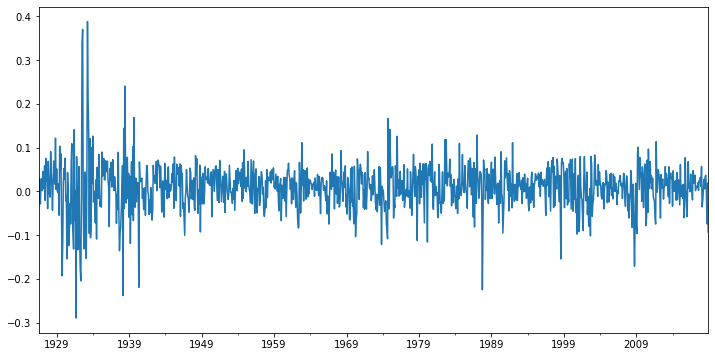

In [4]:
tmi_return.plot(figsize = (12,6));

In [5]:
l = ["Steel","Fin","Beer"]
risky_r = ind_return["2000":][l]
ash.summary_stats(risky_r)

,Annualized Return,Annualized Vol,Skewness,Kurtosis,VaR 5%,Cornish-Fisher VaR 5%,Historic CVaR 5%,Sharpe Ratio,Max Drawdown
Steel,-0.002790,0.312368,-0.326334,4.144381,0.144050,0.150139,0.208117,-0.102567,-0.758017
Fin,0.055166,0.192909,-0.533218,4.995534,0.085336,0.091224,0.132175,0.126718,-0.718465
Beer,0.080598,0.138925,-0.493545,4.173881,0.058532,0.063015,0.091442,0.354314,-0.271368


In [6]:
btr = ash.run_cppi(risky_r)
ash.summary_stats(btr["Wealth"].pct_change().dropna())

,Annualized Return,Annualized Vol,Skewness,Kurtosis,VaR 5%,Cornish-Fisher VaR 5%,Historic CVaR 5%,Sharpe Ratio,Max Drawdown
Steel,-0.005167,0.174180,-1.995143,17.110190,0.081579,0.091995,0.130153,-0.196750,-0.655198
Fin,0.040894,0.131678,-0.946504,6.051414,0.058304,0.065535,0.091621,0.080352,-0.549673
Beer,0.075544,0.115462,-0.669250,4.760879,0.048058,0.052923,0.074908,0.383772,-0.259582


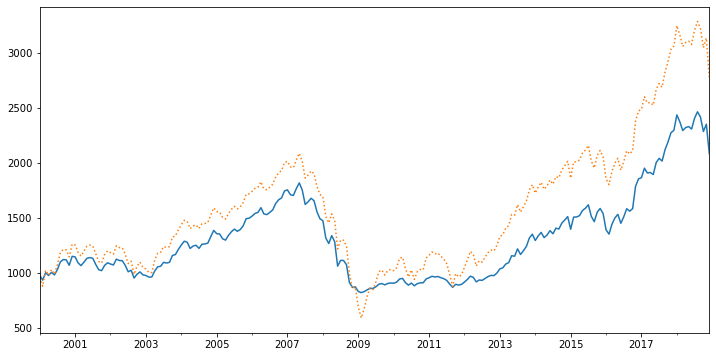

In [10]:
ax = btr["Wealth"]["Fin"].plot(figsize = (12,6));
ash.drawdown(risky_r["Fin"])["Wealth"].plot(style = ":");

In [84]:
tmi_return = ash.get_total_market_index_returns()
tmi_return

File Accepted
Denominator Accepted
File Accepted
Denominator Accepted


1926-07    0.031375
1926-08    0.028957
1926-09    0.005566
1926-10   -0.028504
1926-11    0.028039
             ...   
2018-08    0.036951
2018-09    0.002108
2018-10   -0.074292
2018-11    0.019003
2018-12   -0.092911
Freq: M, Length: 1110, dtype: float64

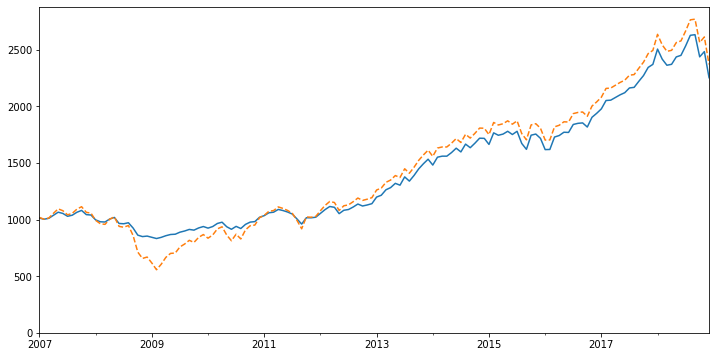

In [98]:
btr_2 = ash.run_cppi(tmi_return["2007":])
ax = btr_2["Wealth"].plot(figsize =(12,6), label = "CPPI",legend = False)
btr_2["Risky Wealth"].plot(ax = ax, style = "--",label = "Risky",legend = False)
ax.set_ylim(bottom = 0);

In [88]:
ash.summary_stats(btr_2["Risky Wealth"].pct_change().dropna())

,Annualized Return,Annualized Vol,Skewness,Kurtosis,VaR 5%,Cornish-Fisher VaR 5%,Historic CVaR 5%,Sharpe Ratio,Max Drawdown
R,0.073411,0.150463,-0.734939,4.523488,0.064319,0.071592,0.096315,0.280618,-0.499943


In [89]:
ash.summary_stats(btr_2["Wealth"].pct_change().dropna())

,Annualized Return,Annualized Vol,Skewness,Kurtosis,VaR 5%,Cornish-Fisher VaR 5%,Historic CVaR 5%,Sharpe Ratio,Max Drawdown
R,0.069416,0.100381,-0.588292,3.740932,0.041469,0.045678,0.062953,0.382052,-0.229683


# Drawdown Constraint

In [100]:
btr_3 = ash.run_cppi(ind_return["2007":][["Steel","Fin","Beer"]], drawdown = 0.25)

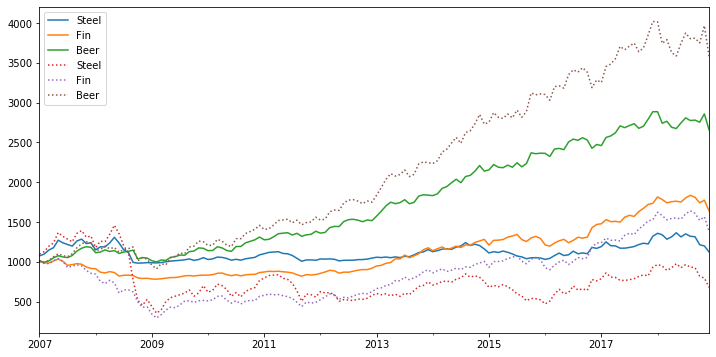

In [101]:
ax = btr_3["Wealth"].plot(figsize = (12,6));
btr_3["Risky Wealth"].plot(ax=ax, style = ":");

In [102]:
ash.summary_stats(btr_3["Risky Wealth"].pct_change().dropna())

,Annualized Return,Annualized Vol,Skewness,Kurtosis,VaR 5%,Cornish-Fisher VaR 5%,Historic CVaR 5%,Sharpe Ratio,Max Drawdown
Steel,-0.039660,0.306407,-0.459951,4.782828,0.144285,0.152288,0.203837,-0.221642,-0.758017
Fin,0.027364,0.212204,-0.695200,4.621401,0.096232,0.105744,0.149862,-0.012370,-0.718465
Beer,0.111554,0.127971,-0.670797,4.650878,0.051015,0.056497,0.077388,0.620132,-0.271368


In [103]:
ash.summary_stats(btr_3["Wealth"].pct_change().dropna())

,Annualized Return,Annualized Vol,Skewness,Kurtosis,VaR 5%,Cornish-Fisher VaR 5%,Historic CVaR 5%,Sharpe Ratio,Max Drawdown
Steel,0.003784,0.097073,-0.441089,5.220481,0.045223,0.047371,0.066991,-0.262958,-0.248059
Fin,0.041975,0.085028,-0.355163,4.153860,0.036500,0.038342,0.054111,0.136964,-0.243626
Beer,0.084375,0.086263,-0.744111,4.571533,0.033734,0.037937,0.051189,0.613413,-0.161186
